# Introduction to Data Science – Homework 4 - 2025
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 7, 2025, 11:59pm.

In this homework, you will study Salt Lake City air quality data and complete an A/B test comparing two ads. 

## Your Data
Fill out the following information: 

*First Name:* Carter   
*Last Name:* Hardy   
*E-mail:* carter.n.hardy@utah.edu   
*UID:* u1538956  


In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: SLC Air Quality Index 

In this problem, you'll study the Air Quality in Salt Lake City. 

### Task 1.0.  Learn about AQI

Read about the [air quality index (AQI)](https://www.airnow.gov/aqi/aqi-basics) and the 
[AirNow](https://www.airnow.gov/about-airnow) system. 


### Task 1.1. Download data
The EPA gives access to historical air quality data at the AirData website. Read about the data available on [this information page](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).


Go to [this website](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the following daily data: 
+ Pollutant = PM2.5
+ Year = 2024
+ City = Salt Lake City, UT
+ Monitor Site = All Sites



Rename the file to SLC_PM2.5.csv

### Task 1.2. Import the data 
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean:

+ The dates are not sorted. 
+ Some dates may have missing values.
+ Some dates may have multiple values corresponding to different sensors (POC=1,2,3,4,5) and different sites.

In [2]:
# your code goes here
#load in data
data = pd.read_csv('SLC_PM2.5.csv')

#data.head()

### Task 1.3. Plot the data

1. The data contains multiple PM2.5 concentration and AQI entries for the same date measured at different sites and with different sensors (POCS). Plot average PM2.5 and AQI values with respect to date in a single figure. Anyone analysing the graph should be able to answer, what is the average PM 2.5 concentration or the AQI value on a particular date. 

2. Plot the average PM 2.5 concentration vs Date for two different sites (site ids - 490353015 and 490450004). Note in this case the average is just taken over POCs. Plot for both the sites should be in a single figure.
*Hint*: use the pandas groupby function


In [3]:
#Check missing data
data.isna().sum()

Date                               0
Source                             0
Site ID                            0
POC                                0
Daily Mean PM2.5 Concentration     0
Units                              0
Daily AQI Value                    0
Local Site Name                    0
Daily Obs Count                    0
Percent Complete                   0
AQS Parameter Code                 0
AQS Parameter Description          0
Method Code                       15
Method Description                15
CBSA Code                          0
CBSA Name                          0
State FIPS Code                    0
State                              0
County FIPS Code                   0
County                             0
Site Latitude                      0
Site Longitude                     0
dtype: int64

**Code Cleanliness**: \
A note on the data cleanliness warning: \
When checking for missing values, I found that only the **Method Code** and **Method Description** columns contain missing values. Since these columns are not needed for this analysis, they should not affect the results. \
Additionally, I will be using .groupby('Date') to organize the data by date, so initially not being organzied by date will not be an issue for the plots. \
Calculating the daily average using .mean() will aggregate values from different sensors and sites, helping to mitigate inconsistencies across locations.

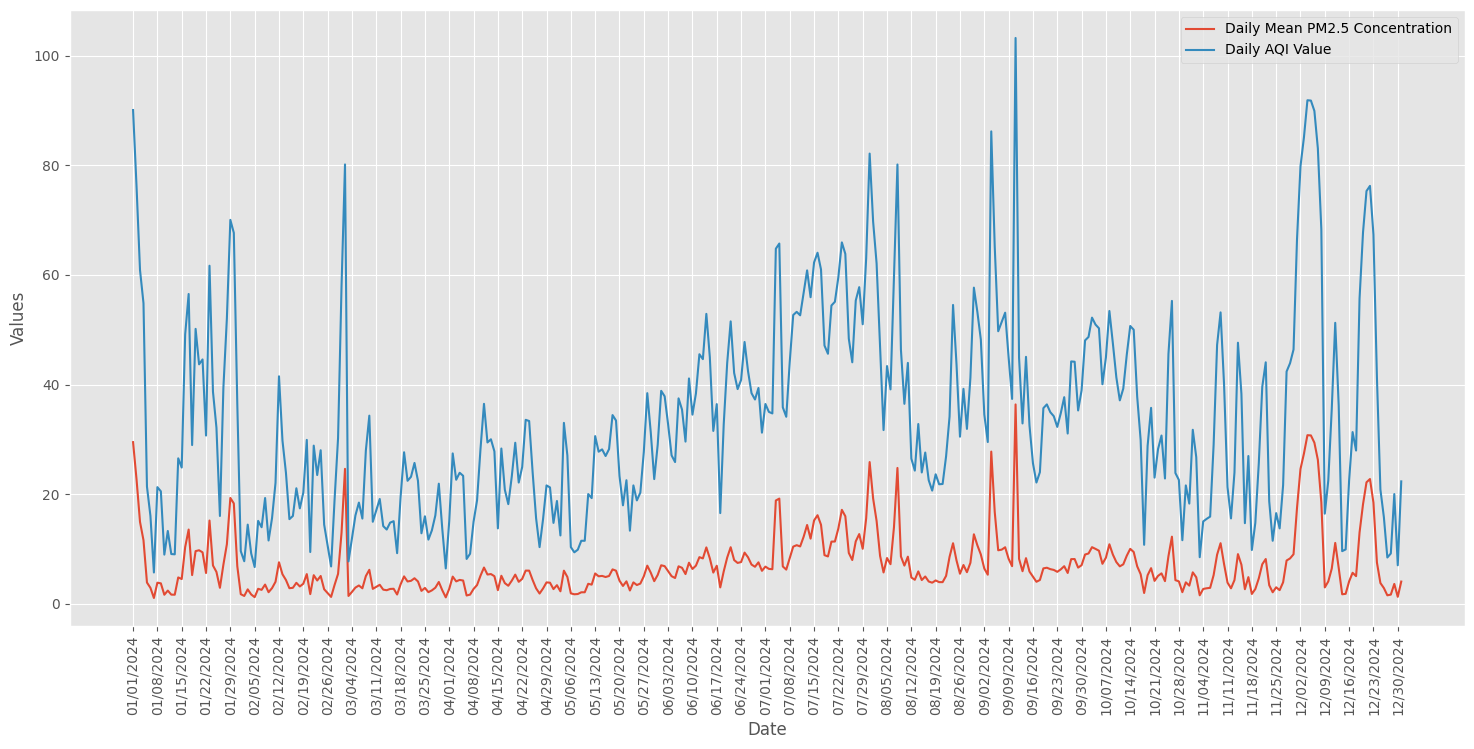

In [4]:
# your code goes here
pm_daily_mean = data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean()
aqi_mean = data.groupby('Date')['Daily AQI Value'].mean()

plt.figure(figsize=(18, 8)) 

plt.plot(pm_daily_mean.index, pm_daily_mean, label = 'Daily Mean PM2.5 Concentration')
plt.plot(aqi_mean.index, aqi_mean, label = 'Daily AQI Value')


plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

plt.xticks(ticks=pm_daily_mean.index[::7], rotation=90)

plt.show()

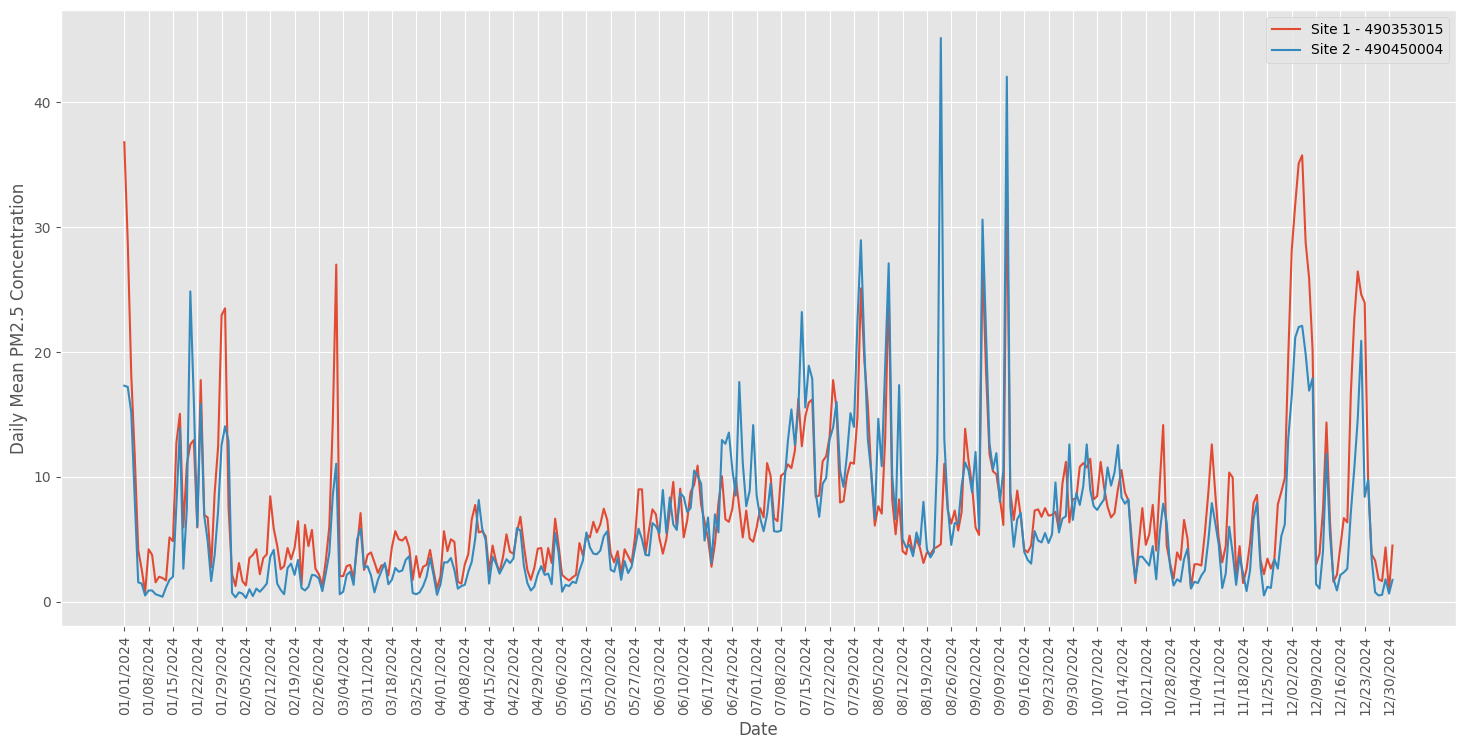

In [5]:
site_groups = data.groupby('Site ID')


site1 = site_groups.get_group(490353015)
site2 = site_groups.get_group(490450004)

site1_ave = site1.groupby('Date')['Daily Mean PM2.5 Concentration'].mean() 
site2_ave = site2.groupby('Date')['Daily Mean PM2.5 Concentration'].mean()

plt.figure(figsize=(18, 8)) 

plt.plot(site1_ave.index, site1_ave, label = 'Site 1 - 490353015')
plt.plot(site2_ave.index, site2_ave, label = 'Site 2 - 490450004')



plt.xlabel('Date')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.legend()

plt.xticks(ticks=site1_ave.index[::7], rotation=90)

plt.show()

## Part 2: A/B testing

First read the WIRED article on A/B testing [here](http://www.wired.com/2012/04/ff_abtesting/).

Suppose your company is developing a new slogan. The marketing department designed two slogans: ‘Slogan A’ and ‘Slogan B’, shown below. 
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)
Your job is to figure out which slogan is better. 


You decide to conduct the following experiment. You use Instagram ads to buy 12000 impressions. In $N_A=6000$ of the ads (randomly chosen), you use Slogan A and in the other $N_B=6000$ ads, you use Slogan B. Then you see which slogan attracts more clicks.

It turns out that $n_A=1700$ Slogan A viewers click on the ad while $n_B=2100$ Slogan B viewers click on the ad. Obviously Slogan B did better in this test, but is the difference *significant* enough to say that Slogan B is better? Or, perhaps, Slogan B just got lucky in this test? 

The goal of this exercise will be to conduct a two-proportion z-test to determine if Slogan B is better. The steps will be similar to those from Lecture 7 used for the 1954 Salk polio-vaccine experiment.

### Task 2.1.  Formulate null hypothesis 

Let $p_A = n_A/N_A$ be the proportion of clicks on Slogan A and similiarly $p_B$ be the proportion of clicks on Slogan B. In terms of $p_A$ and $p_B$, clearly state the null and alternative hypothesis. 

**Your Solution:** 

**Our Null hypothesis is 
$ H_0\colon P_A \geq P_B $** \
That is, Slogan B is not better than Slogan A 

**Our Alternative hypothesis is
$H_A\colon P_A < P_B$** \
That is, Slogan B is better than Slogan A 

We choose this null and alternative hypothesis because the wording of the question states "*is the difference significant enough to say that Slogan B is **better***". Therefore we are testing to see if slogan b is *better* than slogan a, not just if they are not equal.

We should choose a significance level of $\alpha = .05$

### Task 2.2.  Find the two-proportion z-value  

Assuming the null hypothesis, we know from lecture that the test statistic, called the *two-proportion z-value*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
is approximately  distributed according to the standard normal distribution. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 


Find the two-proportion z-value.

In [6]:
# your code goes here
import math
pa = 1700 / 6000
pb = 2100 / 6000
p_hat = (6000 / 12000)*(pa) + (6000/12000)*(pb)
q_hat = 1 - p_hat
z_sc = ( (pa-pb) / math.sqrt( (p_hat*q_hat) * ( (1/6000)+(1/6000) )) )

print('The two-proportion z-value, using the standard normal distribution is:') 
print(z_sc)

The two-proportion z-value, using the standard normal distribution is:
-7.849678864759114


### Task 2.3. Complete the two proportion z-test 

Find the $p$-value for the hypothesis test. Do this first using the normal cdf function and then check your answer by running a two proportions z-test in python with the proportions_ztest function. 

In [7]:
# your code goes here
print('The p-value for our z-score of', z_sc, 'using the normal cdf function is:')
print(norm.cdf(z_sc))
print()

from statsmodels.stats.proportion import proportions_ztest
counts = [1700, 2100]
sample_sizes = [6000, 6000]
z, pval = proportions_ztest(counts, sample_sizes,alternative='smaller')
print('Using the two proportions z-test in python with the proportions_ztest function:')
print('z score:', z)
print('p value:', pval)

The p-value for our z-score of -7.849678864759114 using the normal cdf function is:
2.0855195745306026e-15

Using the two proportions z-test in python with the proportions_ztest function:
z score: -7.849678864759114
p value: 2.0855195745306026e-15


#### **Conclusion:**
We found the same z score and p-value calculating them on our own and using the normal cdf function as we did by using the two proportion z-test in python with the proportions_ztest function. 

Comparing our p-value of 2.08e-15 (very small) to our alpha value of .05, there is strong statistical evidence to **reject the null hypothesis**, meaning that **Slogan b is significantly better than Slogan a**.